# Introduction

Go to `File` $\rightarrow$ `Save a copy in Drive` to save an editable version of this document in your own Google Drive.

# Additional Resources

If you need any help analyzing your data, please stop by the lab space the week of November 28th - December 1st during any of the usual lab times. Lab TFs will be available to answer any and all questions!

You may also contact your lab TF via email - they will typically respond within 24 hours. We are also happy to set up a Zoom time outside of the above office hours if needed.

* Tim: tmilbourne@g.harvard.edu
* Taylor: taylorcontreras@g.harvard.edu
* Abby: abigailcurtis@college.harvard.edu
* Ted: yufei_liu@fas.harvard.edu
* Furkan: sukrufurkanozturk@g.harvard.edu
* Sayalee: spatankar@college.harvard.edu

(Note that if you are asking about a Python error, please include the red error messages in your messages - this will help us diagnose any problems.)

# Define helper functions

Run the below cell to define a few functions from previous labs that may be helpful. Here's a list of these function:

*   `mycurvefit(function, XX, YY, UNCERT)` returns the best-fit values and uncertainties of fit function `function`, given measured data

  (`XX`, `YY` $\pm$ `UNCERT`)

* `get_pvalue(st)` returns the p-value corresponding to a significance test value (`st`)

* `compare_data_to_model_plot(measurements, theory, theory_err)` makes a histogram of measured values, stored in array `measurements`. Also plots a theoretical value with uncertainties (`theory` $\pm$ `theory_err`) for visual comparison

In [102]:
#numpy for doing math
import numpy as np

#matplotlib for plotting
import matplotlib.pyplot as plt

#scipy for more 'science' functions, in this case curve fitting
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import norm

# Latex
from IPython.display import Latex, display

#we need the following package to allow colab to access files on our computer
from google.colab import files

def chisquare(data,model,uncertainty):
    '''
    Calculates value of chi squared for model given data and unvertainty

    Parameters
    ----------
    data : numpy array
            1D vector of data values

    model : numpy array
            1D vector of values predicted by model

    uncertainty : numpy array
            1D vector of uncertainty corresponding to data

    Returns
    -------
    x2 : float
       Returns value of chi squared for this model given data and uncertainty
    '''

    x2 = np.sum((data-model)**2/uncertainty**2)

    return x2


def mycurvefit(func,XX,YY,UNCERT,xlabel=None,ylabel=None,p0=None):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data

    XX : numpy array
            1D vector of data's independent variable

    YY : numpy array
            1D vector of data's dependent variable

    UNCERT : numpy array
            1D vector of uncertainty in YY

    xlabel: string
            label for plot's x-axis

    ylabel : string
            label for plot's y-axis

    Returns
    -------
    fitparams : numpy array
           1D array of best fit values of parameters

    fiterrs : numpy array
            1D array of errors on best fit parameters (taken from sqrt of diag of covariance matrix)


    '''

    ##################################################
    #                Do the curve fit                #
    ##################################################


    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma = UNCERT,absolute_sigma=True, p0=p0)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    # print out the parameters and errors on them
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i +1
        mystring = '\t P' + str(i) + ' = '
        print(mystring,round(A,5),'+/-',round(sigA,5))



    ##################################################
    #                Begin Plotting                  #
    ##################################################

    fig,ax = plt.subplots()
    # plot the raw data
    ax.errorbar(XX,YY,UNCERT,fmt='.',label='data')


    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    ax.plot(XX_shade,func(XX_shade,*fitparams),label = 'best fit')

    if xlabel == None:
      xlabel = ''
    if ylabel == None:
      ylabel = ''

    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()



    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################

    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)

    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom (N-d): ', dof)

    X2 = chisquare(YY,func(XX,*fitparams),UNCERT)
    #X2string = '\t Chi Squared = ' + str(round(X2,1))
    X2redstring = '\t Reduced Chi Squared = '+ str(round(X2/dof,3))
    #print(X2string)
    print(X2redstring)


    return fitparams,fiterrs

#to calculate a 2-tailed p-value from a s.s. value call the function pvalue_1tailed (whose input is an s.s. value)
def get_pvalue(ss_value):
    #print('p-value:', stats.norm.sf(abs(ss_value)))
    return 2*stats.norm.sf(abs(ss_value))

def gaussian_profile(x, mean, std):
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-1/2*(x-mean)**2/std**2)

def compare_data_to_model_plot(measurements, theory, theory_err):

  fig, ax = plt.subplots()
  ax.hist(measurements, density = True, color='blue', alpha = 0.5, label = 'data')
  ylimits = ax.get_ylim()
  #ax.vlines(theory, *ylimits, 'r', linestyle='--', label = 'prediction')
  #ax.axvspan(theory - theory_err, theory + theory_err, color='red', alpha= 0.5)

  ax.errorbar(theory,gaussian_profile(measurements.mean(), measurements.mean(), measurements.std()),
              xerr =theory_err, markersize = 16, fmt = '.r', capsize=8,
              label = 'prediction')


  ax.set_ylim(*ylimits)

  xlimits =ax.get_xlim()
  xplot = np.linspace(*xlimits)
  gaus_meas = gaussian_profile(xplot, measurements.mean(), measurements.std())
  ax.plot(xplot, gaus_meas, '--k', alpha=0.75, label = 'distribution of data')
  ax.errorbar(measurements.mean(), gaus_meas.max(), xerr = measurements.std()/np.sqrt(len(measurements)), markersize = 16, fmt = '.k', capsize=8)

  ax.set_xlim(*xlimits)

  ax.legend()
  return

#Research question

what is your research question? Do you have an expectations about what the answer will be? Explain your hypothesis below:

>> Question: Upon an orthostatic heart rate test, will the heart rate of an individual with postural orthostatic tachycardia syndrome (POTS) rise more than that of an individual of the same sex and approximate age without POTS?

Hypothesis: Given the pathophysiology and diagnostic criteria of POTS, both marked by an abnormal increase in standing heart rate, the individual with POTS should have more of an increase in heart rate than the healthy individual during a standing/orthostatic test.

#Experimental design

What data will you take? How will you measure it? What sets your experimental unceretainties? Explain below.

>> Methods: A 20-year-old female with POTS (me) and a 21-year-old female without POTS (my consenting friend) will both do the following test. Measurements were taken in the same location and within 45 minutes of one another. Heart rate data collected via Apple Watch Series 8 in "Workout Mode" (readings every few seconds).

1. Lie supine on couch for 5 minutes to let heart rate settle to stable resting rate. ( 00:00 to 05:00)
2. Stand up from the couch and remain standing still for 10 minutes. (05:01 - 15:00).

Resulting heart rates were exported from Apple Watch. Heart rate readings did not occur at a steady interval, so, to standardize time, readings from both individuals were assigned times rounded to 5 second intervals, with the standardized time lying within 10s (usually within 5s) of both actual time points. For computational ease, the standardized times were converted into minutes.

Uncertainty: Heart rate readings are integers, meaning that there is an uncertainty of at least 1 bpm. Additionally, though among the more accurate consumer-grade wearable heart rate monitors, the sensor on the Apple Watch Series 8 still has some degree of error. Information on Apple Watch Series 8 heart rate uncertainty and error is extremely scarce, but studies with other iterations can help estimate the likely uncertainty. One study ($n$ = 6) found that the Apple Watch Series 6 tended to yield hear rate measurements 0.5 ± 2.1 bpm above those generated by electrocardiogram (ECG), which is the clinical gold standard (Miller et al., 2022). Another saw a mean absolute error of 1.59bpm when comparing 327 heart rate measurements taken by a Series 7 Apple Watch vs. an ECG (Helmer et al., 2022). As a result, I feel comfortable concluding that the overall uncertainty in heart rate measurement is probably less than ~5 bpm.

Helmer, P., Hottenrott, S., Rodemers, P., Leppich, R., Helwich, M., Pryss, R., Kranke, P., Meybohm, P., Winkler, B. E., & Sammeth, M. (2022). Accuracy and Systematic Biases of Heart Rate Measurements by Consumer-Grade Fitness Trackers in Postoperative Patients: Prospective Clinical Trial. Journal of medical Internet research, 24(12), e42359. https://doi.org/10.2196/42359

Miller, D. J., Sargent, C., & Roach, G. D. (2022). A Validation of Six Wearable Devices for Estimating Sleep, Heart Rate and Heart Rate Variability in Healthy Adults. Sensors (Basel, Switzerland), 22(16), 6317. https://doi.org/10.3390/s22166317



#Import your data

If you saved your data in a `.txt` or `.csv` file, you can use the below cell to upload your data.

You can also write your data into the notebook directly by creating an array - see the third cell below:



In [48]:
#upload the file to colab so python can read from it
uploaded = files.upload()

Saving clean_data.csv to clean_data (2).csv


In [50]:
#read the file
#you will have to change the filename to what you named the file
#first is the file name, which you defined on the lab computer
#second is the skiprows=1, to tell python to skip the column names. These strings would confuse the array, which only wants numbers
#third is delimiter=',' to tell python that commas separate our columns. We can double check what this is by opening the data as a plain text

data_table = np.loadtxt('clean_data (2).csv', skiprows = 1, delimiter = ',')
print(data_table)


[[0.000e+00 7.500e+01 7.700e+01]
 [8.000e-02 7.800e+01 7.600e+01]
 [1.700e-01 8.200e+01 7.600e+01]
 [2.500e-01 8.100e+01 7.700e+01]
 [3.300e-01 7.200e+01 7.800e+01]
 [4.200e-01 7.200e+01 7.800e+01]
 [5.000e-01 7.200e+01 7.500e+01]
 [5.800e-01 7.100e+01 7.900e+01]
 [6.700e-01 7.000e+01 7.700e+01]
 [7.500e-01 6.900e+01 7.400e+01]
 [8.300e-01 7.000e+01 7.200e+01]
 [9.200e-01 7.100e+01 7.000e+01]
 [1.000e+00 6.900e+01 7.100e+01]
 [1.080e+00 6.700e+01 7.100e+01]
 [1.170e+00 6.800e+01 7.300e+01]
 [1.250e+00 6.700e+01 7.200e+01]
 [1.330e+00 6.800e+01 7.200e+01]
 [1.420e+00 6.800e+01 7.000e+01]
 [1.500e+00 6.800e+01 6.900e+01]
 [1.580e+00 7.000e+01 7.000e+01]
 [1.670e+00 7.000e+01 7.000e+01]
 [1.750e+00 7.100e+01 7.100e+01]
 [1.830e+00 7.100e+01 7.100e+01]
 [1.920e+00 7.100e+01 7.100e+01]
 [2.000e+00 6.800e+01 7.100e+01]
 [2.080e+00 6.700e+01 7.000e+01]
 [2.170e+00 6.800e+01 7.500e+01]
 [2.250e+00 6.700e+01 7.400e+01]
 [2.330e+00 6.700e+01 7.300e+01]
 [2.420e+00 7.200e+01 7.100e+01]
 [2.500e+0

In [ ]:
#or you can write put everyting into arrays
times = np.array([])

# Analyze your data

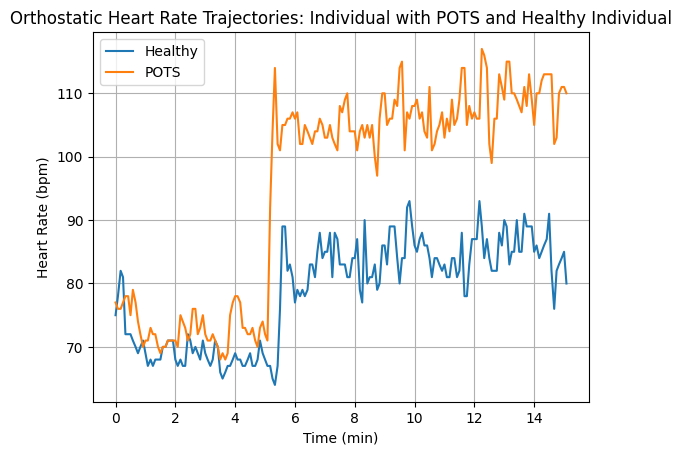

In [64]:
# exploratory visualization
d = data_table
t = d[:, 0]
v = d[:, 1]
s = d[:, 2]

fig, ax = plt.subplots()
ax.plot(t, v, label = 'Healthy')
ax.plot(t, s, label = 'POTS')

ax.set(xlabel='Time (min)', ylabel='Heart Rate (bpm)',
       title='Orthostatic Heart Rate Trajectories: Individual with POTS and Healthy Individual')
ax.grid()
ax.legend()

fig.savefig("test.png")
plt.show()

In [65]:
# want to standardize standing data, so found average supine heart
# rate from last 2 minutes of lying down (3-5) and calculated standing
# heart rate increase for both individuals

# upload new file
uploaded = files.upload()

Saving IncreaseData.csv to IncreaseData.csv


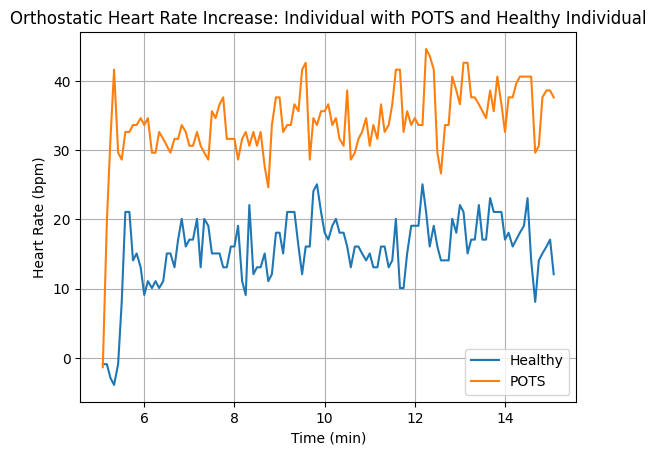

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

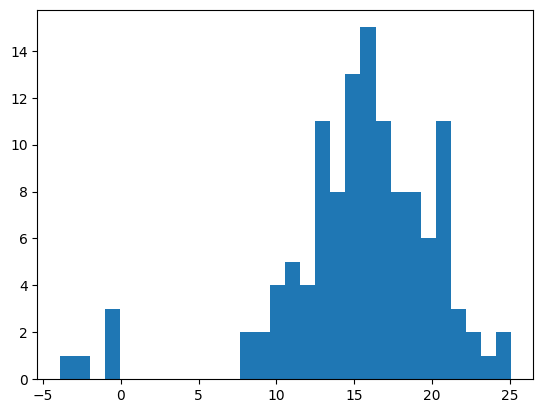

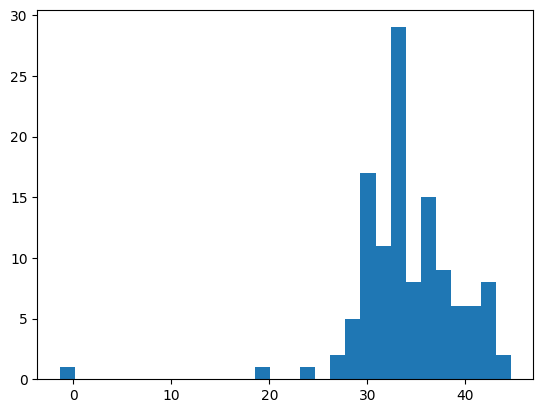

s.t. is 27.395939252962453
p-value of s.t. is 1.5345114634957914e-165


TtestResult(statistic=27.28249802343412, pvalue=1.815343971851142e-75, df=239.7255384479082)

In [159]:
# make array from new file
increase_data = np.loadtxt('IncreaseData.csv', skiprows = 1, delimiter = ',')

# visualize increase data
# exploratory visualization
i = increase_data
t = i[:, 0]
h = i[:, 1]
p = i[:, 2]

fig, ax = plt.subplots()
ax.plot(t, h, label = 'Healthy')
ax.plot(t, p, label = 'POTS')

ax.set(xlabel='Time (min)', ylabel='Heart Rate (bpm)',
       title='Orthostatic Heart Rate Increase: Individual with POTS and Healthy Individual')
ax.grid()
ax.legend()

fig.savefig("test.png")
plt.show()

# summarizing data

# means
mu_h = mean_increase_healthy = np.mean(h)
mu_p = mean_increase_pots = np.mean(p)
# stds
sigma_h = std_increase_healthy = np.std(h)
sigma_p = std_increase_pots = np.std(p)
# standing measurements per person
N = len(t)
# uncert in means
uncert_in_mean_healthy = std_increase_healthy/np.sqrt(N)
uncert_in_mean_pots = std_increase_pots/np.sqrt(N)
# print
display(Latex(f'$\mu_h = {np.round(mean_increase_healthy,2) }$'))
display(Latex(f'$\mu_p = {np.round(mean_increase_pots,2) }$'))
display(Latex(f'$\sigma_h = {np.round(std_increase_healthy,2)}$'))
display(Latex(f'$\sigma_p = {np.round(std_increase_pots,2)}$'))
display(Latex(f'$\sigma_\mu(h) = {np.round(uncert_in_mean_healthy,2)}$'))
display(Latex(f'$\sigma_\mu(p) = {np.round(uncert_in_mean_pots,2)}$'))

# check normal distribution
plt.hist(h, bins = 30)
plt.show()
plt.hist(p, bins=30)
plt.show()
# aside from outliers produced immediately after standing, heart rates for both
# individuals are fairly normally distributed

# hypothesis testing

# significance test
st = np.abs(mean_increase_pots - mean_increase_healthy)/np.sqrt(uncert_in_mean_pots**2 + uncert_in_mean_healthy**2)
print(f's.t. is {st}')

import scipy.stats
# p-value for st
p_value = scipy.stats.norm.sf(abs(27.3959))
print(f'p-value of s.t. is {p_value}')

# confirmation via t-test
stats.ttest_ind(a=p, b=h, equal_var=False)

>> First, I made an exploratory visualization of the raw heart rate (HR) data across the whole test period (supine and standing). This visually showed an obviously larger heart rate increase in the individual with POTS (vs. the one without) after standing, and demonstrated that their supine heart rates were fairly similar.

>> Since I was interested in orthostatic HR increase--not just heart rate--the raw HR values were converted to HR increases over each participant's average resting HR for the last 2 minutes supine (done in Excel, see increase_data.csv).

>> From there, the new data were visualized, which provided a graph very similar to minutes 5-15 (standing period) of the raw data graph--as expected.

>> The mean orthostatic HR increases were then quantified for each group--as seen above, $μ_h$ = 15.59 bpm and $μ_p$ = 34.08 bpm. The standard deviations for both sets of measurements were fairly similar, with $σ_h$ = 5.16 and $σ_h$ = 5.34, indicating that the heart rate variation was similar during standing. The uncertainty of the means, or the standard errors, were also pretty similar: $σ_{\mu_h}$ = 0.47 and $σ_{\mu_p}$ = 0.49.

>> Before performing the significance test and t-test, I created histograms to see the distribution of the data for both participants. Because there are outliers from the period of getting up/first standing, it's hard to tell whether a normal distribution, a t distribution, or something else would best describe the data. As such, I performed both the significance test (which seems to basically be a Z score, which often assumes a normal distribution) and a t-test (assumes t distribution). The s.t. and t-test statistics were incredibly similar at 27.396 and 27.282, respectively. Additionally, both methods yielded extremely small p-values (probably because of the large number of measurements per person): 1.535e-165 for s.t. and 1.815e-75 for t-test.

# Draw conclusions

In [ ]:
# see above

>> Given the analysis and statistically significant results above (s.t. > 2, p < 0.05), we have evidence that we can reject the null hypothesis, suggesting that there is likely a difference in orthostatic heart rate increase in an individual with POTS vs. without POTS. However, a major limitation of this analysis is the fact that there was only one person in each group. Because there were so many measurements per person, we have quite a small p-value, but without larger and more representative samples (one person can hardly be representative) this analysis is far too underpowered to actually conclude anything definitively. Given the controversy around diagnostic methods and cutoffs for POTS, large-scale comparisons of orthostatic heart rate increases in both healthy individuals--and in people with confirmed or suspected POTS--might allow for improved diagnostics that are more accurately grounded in physiology and an understanding of how "normal" orthostatis actually looks.